In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pickle

In [2]:
input_df = pd.read_csv("Input_data.csv")

print(input_df.head())
print(input_df.tail())

   Id  Height  Weight
0   1     121      21
1   2     122      22
2   3     123      23
3   4     124      24
4   5     125      25
    Id  Height  Weight
45  46     166      66
46  47     167      67
47  48     168      68
48  49     169      69
49  50     170      70


(33, 1)
(17, 1)
(33,)
(17,)
    Id  Predicted Value  Actual Value
3    4             24.0            24
4    5             25.0            25
6    7             27.0            27
8    9             29.0            29
12  13             33.0            33
13  14             34.0            34
17  18             38.0            38
19  20             40.0            40
25  26             46.0            46
26  27             47.0            47
30  31             51.0            51
32  33             53.0            53
37  38             58.0            58
39  40             60.0            60
41  42             62.0            62
45  46             66.0            66
48  49             69.0            69


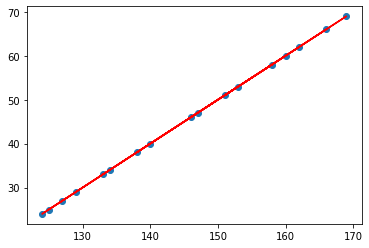

Coefficients:  [1.]
Variance score: 1.0


In [3]:
id_numbers = input_df['Id']
input_df = input_df.drop('Id',axis=1)

y = input_df['Weight']
input_df = input_df.drop('Weight',axis=1)

X_train, X_test, y_train, y_test = train_test_split(input_df, y, test_size=0.33, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

lr = LinearRegression()

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

res = y_test.to_frame('Actual Value')
res.insert(0, 'Predicted Value', y_pred)
res = id_numbers.to_frame().join(res, how='inner')
print(res)

plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red')
plt.show()

# regression coefficients
print('Coefficients: ', lr.coef_)
  
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(lr.score(X_test, y_test)))

In [6]:
test = [[180]]
lr.predict(test)

array([80.])

In [10]:
# save the model to disk
filename = 'Linear_Regression_model.sav'
pickle.dump(lr, open(filename, 'wb'))

In [11]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(test)
# result = loaded_model.score(X_test, Y_test)
print(result)

[80.]


In [12]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state = 0) 
dt.fit(X_train, y_train)
dt.predict(test)

array([70.])

In [13]:
# save the model to disk
filename = 'Decision_Tree_model.sav'
pickle.dump(dt, open(filename, 'wb'))

In [14]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(test)
# result = loaded_model.score(X_test, Y_test)
print(result)

[70.]


In [15]:
test = [[190]]
print(lr.predict(test))
print(dt.predict(test))

[90.]
[70.]
